In [ ]:
### Plotting on a map 
### We plot data on a map using various libraries and functions, basemap, osmnx, cartopy.
### We collect here example programs for plotting data on map.

In [1]:
'''
We plot locations moves_processed_data['lat'] on a map of human mobility 
Let us plot the color of each country according to total number of flights in year 2013

For this we first plot background map
'''
import geopandas as gpd
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from collections import OrderedDict
import networkx as nx
from descartes import PolygonPatch

def plot_function(lat_arr,lon_arr):
    
    '''
    Plot points from arrays 
    lat_arr, lon_arr 
    on the world map
    '''    
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    
    ll_to_pixel = ccrs.Geodetic()._as_mpl_transform(ax)
    
    # We need to call draw to ensure that the axes location has been defined
    # fully. 
    plt.draw()
    
    # Now lets figure out the pixel coordinate of the city.
    x1_pix = lat_arr[0]
    x2_pix = lat_arr[1]
    y1_pix = lon_arr[0]
    y2_pix = lon_arr[1]    
    x1_pix, y1_pix = ll_to_pixel.transform_point([151.2111, -33.8600])
    x2_pix, y2_pix = ll_to_pixel.transform_point([101.2111, -33.8600])
    
    # We can even plot these pixel coordinates directly with matplotlib.
    plt.plot(x1_pix, y1_pix, 'ob', markersize=25, transform=None)
    plt.plot(x2_pix, y2_pix, 'ob', markersize=25, transform=None)
    
    #plt.savefig('figure_1.png', dpi=plt.gcf().get_dpi())
    plt.show()  

In [2]:
'''
We plot location of random locations 
with latitude and longitude on Folium map.

Then we connect them by the line.
'''
import folium

import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

#choose locations we want to plot
latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
mapit = folium.Map( location=[52.667989, -1.464582], zoom_start=6 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

coordinates = latlon #zip(lats, lons)
print(coordinates)

#draw connecting line between locations
SAF=folium.PolyLine(locations=coordinates,weight=5,color = 'red')
mapit.add_child(SAF)

mapit

[(51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]


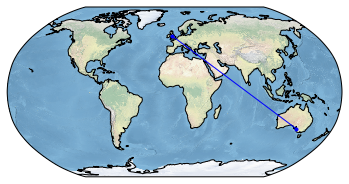

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.stock_img()

ad_lat, ad_lon = -34.93, 138.60
liv_lat, liv_lon = 53.41, -2.99

# New bit: transform the given lat/lon points into the Robinson projection
geodetic = ccrs.Geodetic()
robinson = ccrs.Robinson()
ad_lon_t, ad_lat_t = robinson.transform_point(ad_lon, ad_lat, geodetic)
liv_lon_t, liv_lat_t = robinson.transform_point(liv_lon, liv_lat, geodetic)

# Draw connection between datapoints
plt.plot([ad_lon_t, liv_lon_t], [ad_lat_t, liv_lat_t],
         color='blue', linewidth=1, marker='o', markersize=3,
         # Be explicit about which transform you want:
         transform=robinson)

plt.show()

### Interactive maps

With folium we can design interactive maps

https://automating-gis-processes.github.io/CSC/lessons/L6/interactive-map-folium.html

Whenever you go into a website that has some kind of interactive map, it is quite probable that you are wittnessing a map that has been made with a JavaScipt library called Leaflet (the other popular one that you might have wittnessed is called OpenLayers).



In [2]:
import folium

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles='Stamen Toner',
                   zoom_start=10, control_scale=True)

outfp = "C:/Users/lyubo/Documents/DATA_networks/mobilitydata/base_map.html"

m.save(outfp)

### Ploting geographical map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


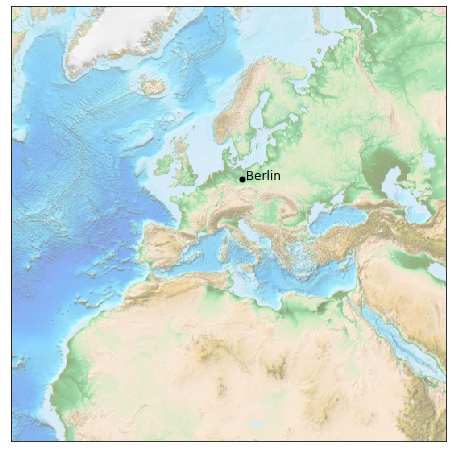

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=10,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(13.6, 52.3)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Berlin', fontsize=12);



In [ ]:
# example programs for plotting data on map